In [200]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error

## Lies `heights-weights.csv` in einen DataFrame

In [201]:
df = pd.read_csv('data/heights-weights.csv')
df.head()

,Height,Weight,Sex
0,179.227959,82.184853,male
1,161.272583,72.826430,female
2,163.369726,61.739943,female
3,156.540166,50.427042,female
4,155.050350,51.338797,female


## Visualisiere die Verteilung von `Height` getrennt nach `Sex`

<AxesSubplot:xlabel='Height', ylabel='Count'>

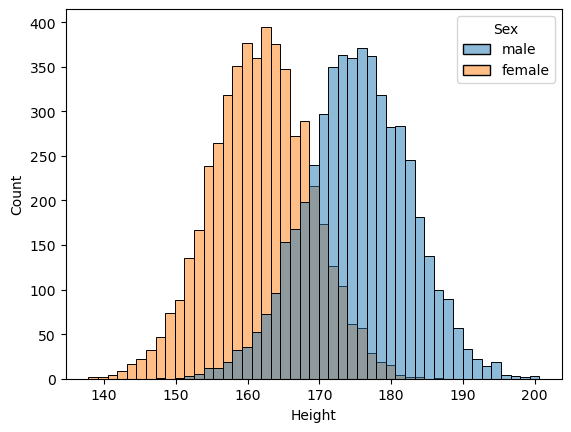

In [202]:
sns.histplot(data=df, x=df.Height, hue='Sex')

## Data Cleaning

Entferne alle `NaN` Werte folgendermaßen:
* entferne alle Observations, bei denen das Geschlecht unbekannt ist
* ergänze numerische Features mit einem Mittelwert des jeweiligen Geschlechts

In [203]:
print(len(df))
df.isna().sum()

10000


Height     0
Weight    98
Sex        5
dtype: int64

In [204]:
df = df[df['Sex'].notna()]
len(df)

9995

In [205]:
df["Height"] = df.groupby(by='Sex')["Height"].apply(lambda height: height.fillna(height.mean()))
df["Weight"] = df.groupby(by='Sex')["Weight"].apply(lambda height: height.fillna(height.mean()))

## Training

* verwende 20% Testdaten und `random_state=42`
* predicte `Height`. Dabei sind zwei verschiedene Vorgangsweisen zu implementieren und zu vergleichen:
    1. mit Hilfe einer einfachen linearen Regression ist `Height` **nur** aus `Weight` zu predicten
    2. neben `Weight` ist auch `Sex` zu verwenden.

In [206]:
X = df.drop(columns=['Height', 'Sex'])
y = df["Height"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [207]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
#calc_error(lin_model, X_test, y_test)

LinearRegression()

In [208]:
def calc_error(model, X_test, y_true):
    predictions = model.predict(X_test)
    return np.sqrt(mean_squared_error(y_true, predictions))

In [209]:
calc_error(lin_model, X_test, y_test)

3.815614900107058

In [210]:
isMaleDf = df.drop(columns='Sex')
isMaleDf["ismale"] = df.Sex.replace({'male': 1, 'female': 0})

X = isMaleDf.drop(columns=['Height'])
y = isMaleDf["Height"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [211]:
lin_weight_sex = LinearRegression()
lin_weight_sex.fit(X_train, y_train)
calc_error(lin_weight_sex, X_test, y_test)

3.7256463091183245

## Evaluierung (nur das Modell mit beiden Features)

* Stelle die Verteilung der Fehler in einem `distplot` dar
* Predicte deine eigenen Daten

C:\Users\floka\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

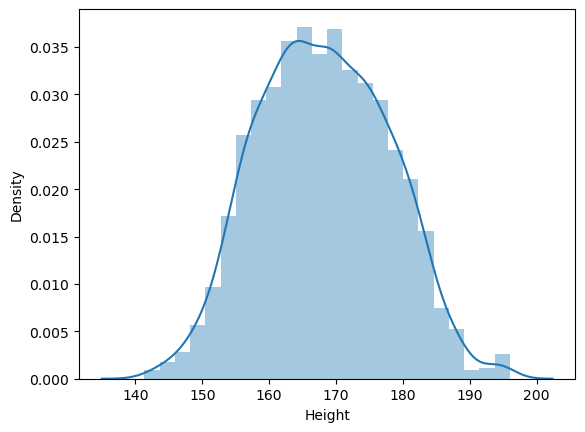

In [212]:
predictions = lin_weight_sex.predict(X_test)
sns.distplot(abs(y_test-predictions), x=y_test)

In [213]:
lin_weight_sex.predict([[82, 1]])

C:\Users\floka\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([173.39712057])

Model predicted my size wrong. I am  actually 185 cm tall.